In [1]:
import cv2 # tested with 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
%matplotlib inline

# 3. Edge Detection

In [2]:
from skimage.measure import compare_ssim
from evaluate import evaluate
# The code returns the accuracy of the edge detector when compared against the ground truth
# OUTPUT_FILE_PATH: Path of the image containing the edges obtained using edge detector
# GROUND_TRUTH_PATH: Path of the corresponding ground truth image (present in the folder data/ground_truth)
# An example of how to use the evaluate function is shown as follows:
OUTPUT_FILE_PATH = 'data/test.png'
GROUND_TRUTH_PATH = 'data/ground_truth/3096.bmp'
print 'Accuracy: %f' %(evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH))

Accuracy: 0.621913


In [3]:
image_path = './data/img/*'

In [4]:
images = sorted(glob.glob(image_path))
ground_truths = sorted(glob.glob('./data/ground_truth/*'))

#### Running it for all images

In [5]:
# Plot function for the entire notebook
def plot_image(original,detector):
    fig = plt.figure(figsize=(15,15))
    ax = plt.subplot(1,2,1)
    ax.axis('off')
    plt.imshow(original, cmap = 'gray')
    ax = plt.subplot(1,2,2)
    ax.axis('off')
    plt.imshow(detector, cmap = 'gray')

## 3.1 Edge Detector 1:  Sobel

In [6]:
### Fill your code here
### Report the accuracy obtained
### Report any improvements you have tried

In [7]:
Sobel_avg_acc = []

In [8]:
def sobel_edges(imagepath):
    image = cv2.imread(imagepath,0)
    sobel_x = cv2.Sobel(image,cv2.CV_64F,1,0,ksize = 3)
    sobel_y = cv2.Sobel(image,cv2.CV_64F,0,1,ksize = 3)
    sobel = (sobel_x**2 + sobel_y**2)**0.5
    plot_image(image,sobel)
    write_name = imagepath[image_path.rfind('/')+1:]
    cv2.imwrite(write_name, sobel)
    return write_name

./data/img/12084.jpg	 Accuracy: 0.061334
./data/img/14037.jpg	 Accuracy: 0.628480
./data/img/16077.jpg	 Accuracy: 0.036736
./data/img/19021.jpg	 Accuracy: 0.057176
./data/img/21077.jpg	 Accuracy: 0.421552
./data/img/24077.jpg	 Accuracy: 0.257757
./data/img/3096.jpg	 Accuracy: 0.850539
./data/img/33039.jpg	 Accuracy: 0.000000
./data/img/37073.jpg	 Accuracy: 0.744827
./data/img/8023.jpg	 Accuracy: 0.510696


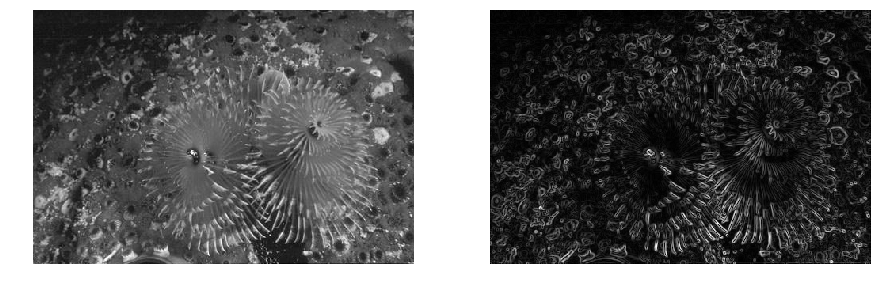

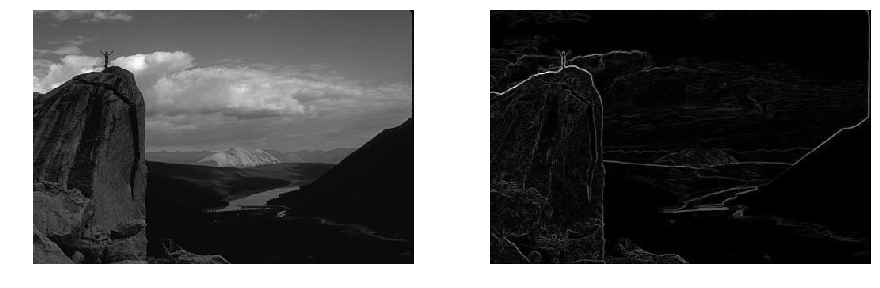

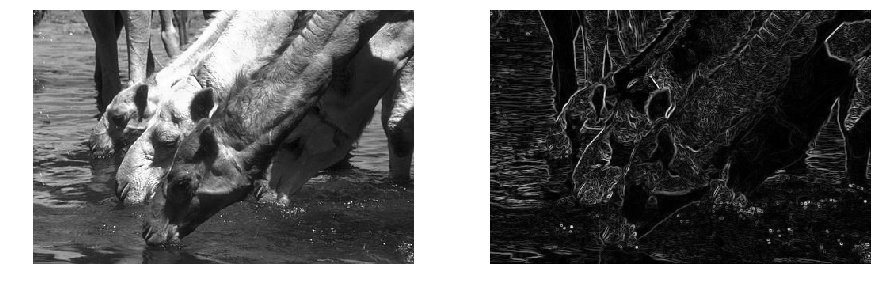

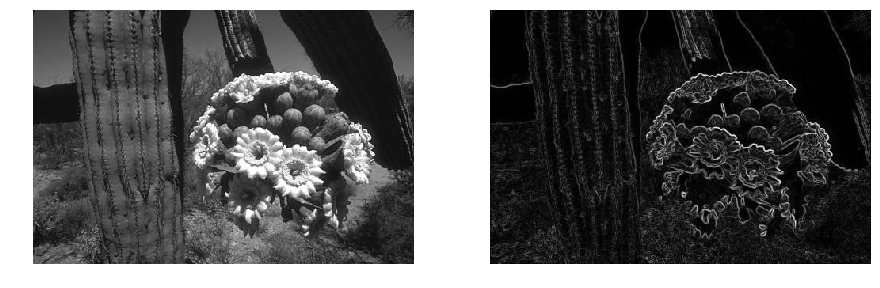

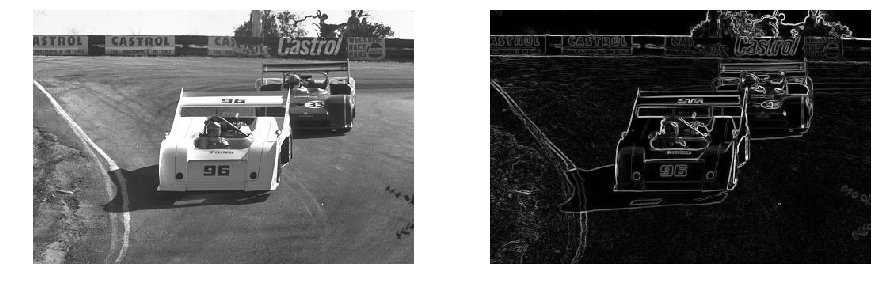

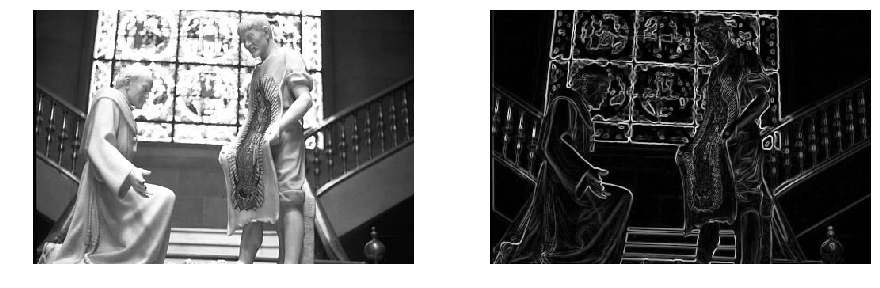

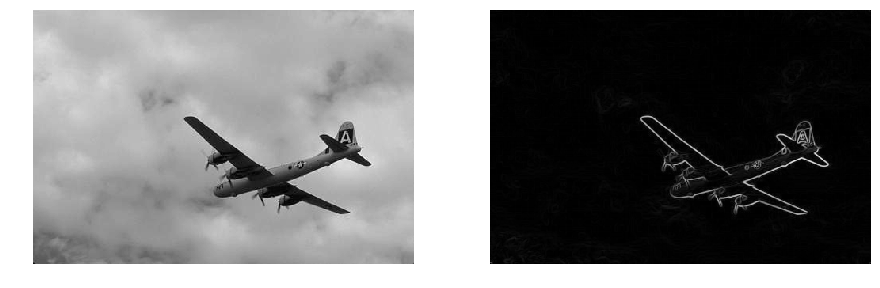

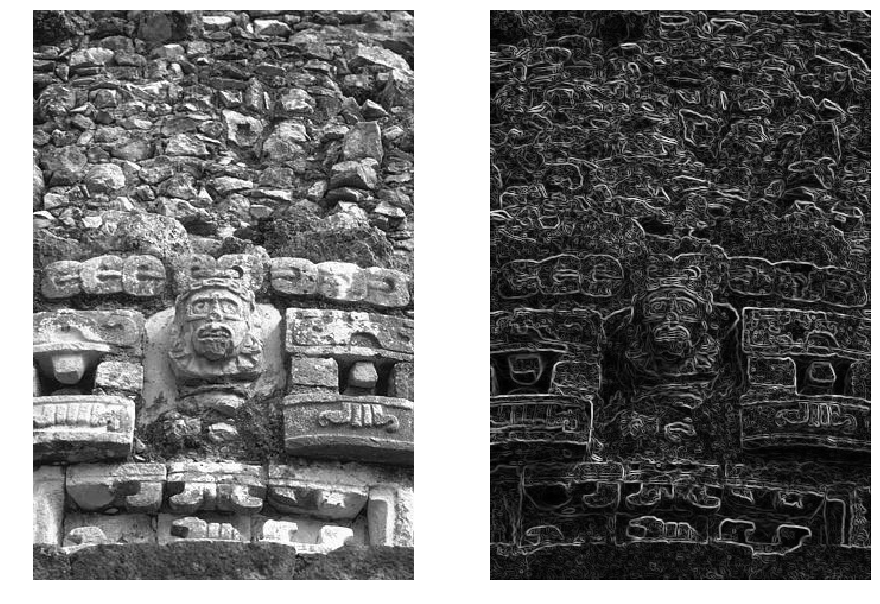

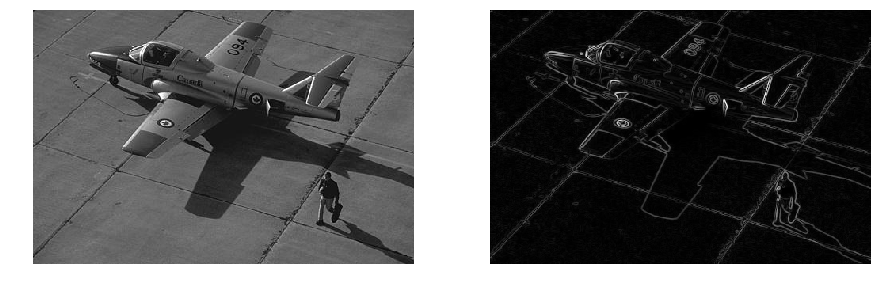

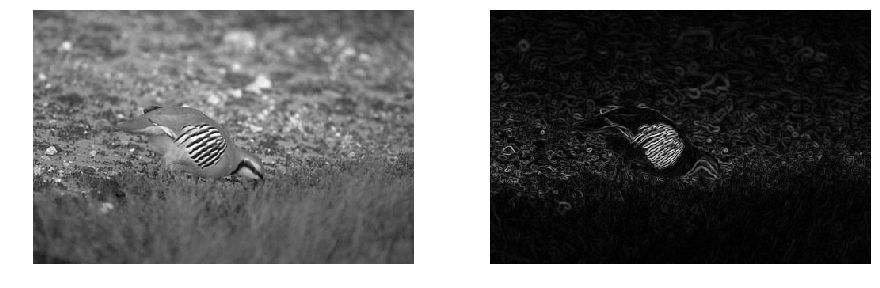

In [9]:
for ip in range(len(images)):
    file_name = sobel_edges(images[ip])
    
    Output_file_path = os.path.join('./',file_name)
    Ground_truth_path = ground_truths[ip]
    accuracy = evaluate(Output_file_path,Ground_truth_path)
    Sobel_avg_acc.append(accuracy)
    print images[ip] + '\t Accuracy: %f' %(accuracy)

In [11]:
# Calculating the average accuracy of the model
print 'Average accuracy over all the images is: ' + str(np.array(Sobel_avg_acc).mean()*100) + "%"

Average accuracy over all the images is: 35.6909605508%


- Using Sobel over all images gives an accuracy of about 35%
- We see that it gives a really good approximation of the edges in every image but there are still some extra edges present that contribute to the noise
- We see that for some images it has a really low accuracy. This is beacuse for example in the first image, the ground truth considers only the main plant and not the surrounding, but sobel detects the rest of the surfaces and builds edges around them which contribute to the noise. Similarly in the third image the ground truth consists only of the the neck of the animals, but sobel detects different surfaces (like hair) on the animal.

## 3.2 Edge Detector 2:  Canny

In [12]:
### Fill your code here
### Report the accuracy obtained
### Report any improvements you have tried

In [13]:
Canny_avg_acc = []

In [14]:
def canny_edges(imagepath):
    image = cv2.imread(imagepath,0)
    edges = cv2.Canny(image,100,200,L2gradient = True)
    plot_image(image,edges)
    write_name = imagepath[image_path.rfind('/')+1:]
    cv2.imwrite(write_name, edges)
    return write_name

./data/img/12084.jpg	 Accuracy: 0.329428
./data/img/14037.jpg	 Accuracy: 0.724775
./data/img/16077.jpg	 Accuracy: 0.369078
./data/img/19021.jpg	 Accuracy: 0.349726
./data/img/21077.jpg	 Accuracy: 0.598118
./data/img/24077.jpg	 Accuracy: 0.366189
./data/img/3096.jpg	 Accuracy: 0.850292
./data/img/33039.jpg	 Accuracy: 0.000000
./data/img/37073.jpg	 Accuracy: 0.741588
./data/img/8023.jpg	 Accuracy: 0.725293


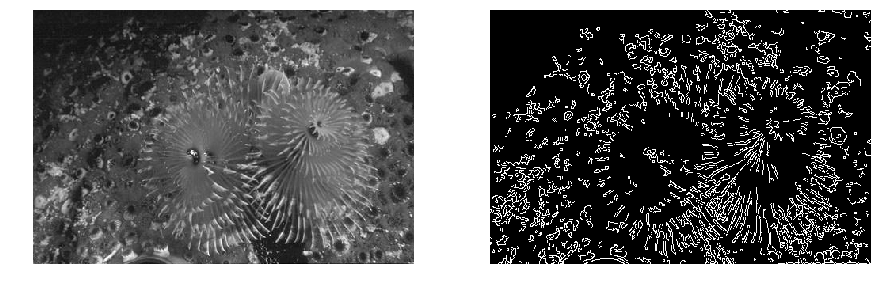

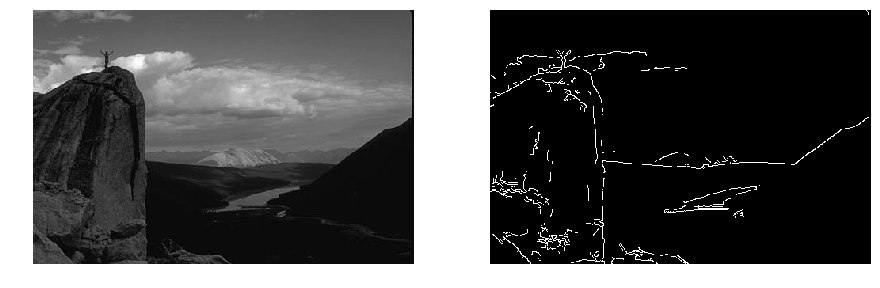

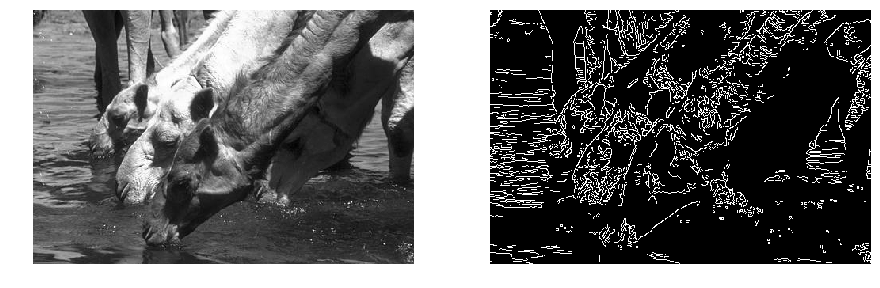

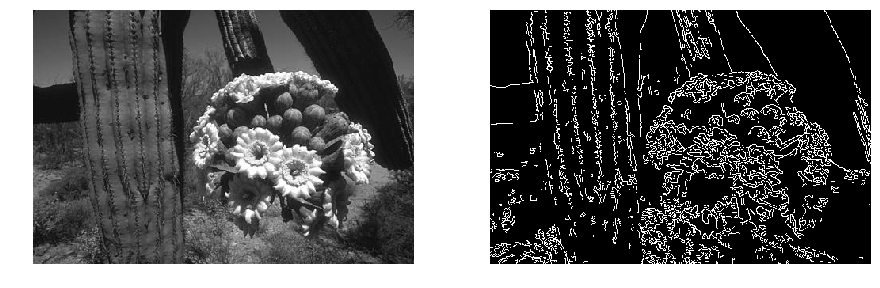

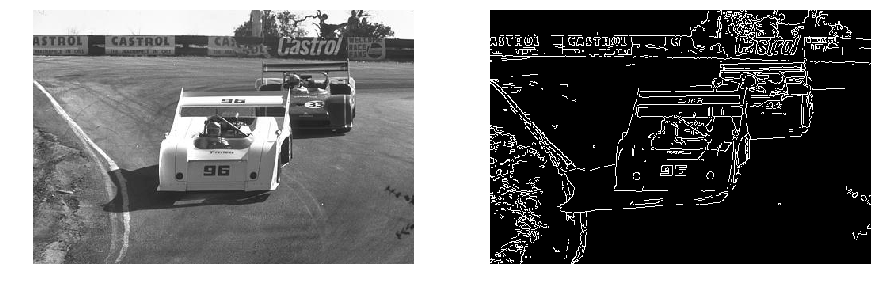

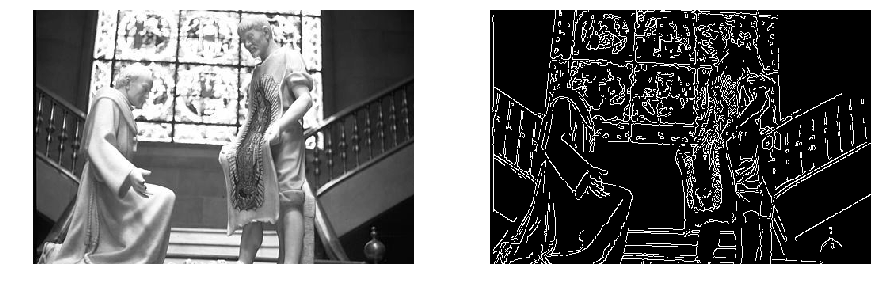

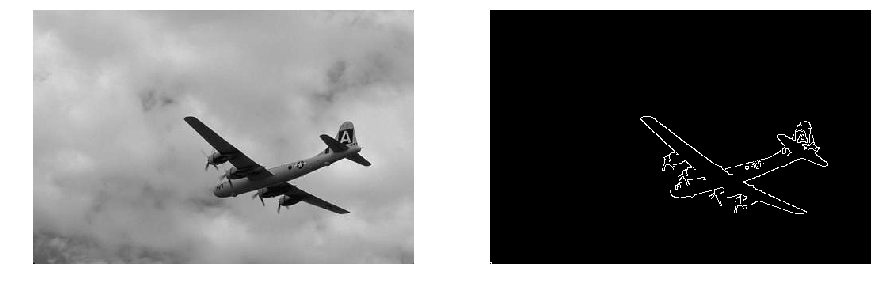

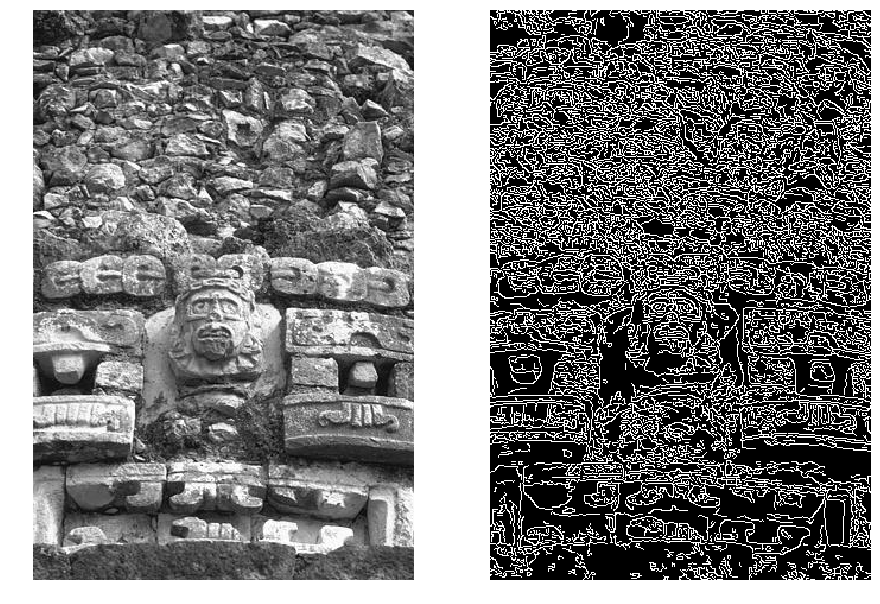

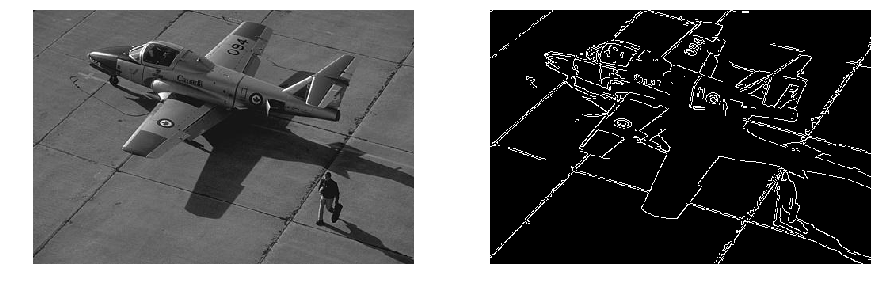

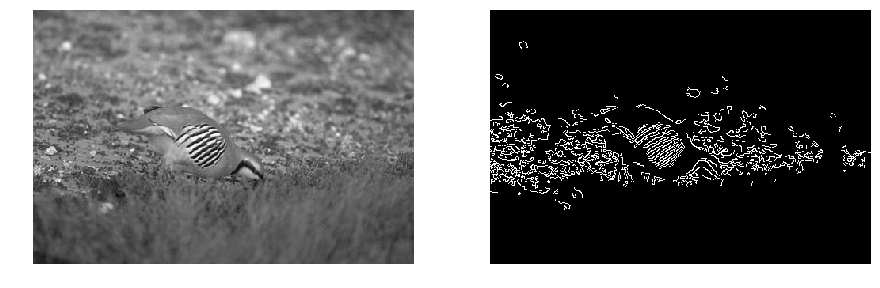

In [15]:
for ip in range(len(images)):
    file_name = canny_edges(images[ip])
    
    Output_file_path = os.path.join('./',file_name)
    Ground_truth_path = ground_truths[ip]
    accuracy = evaluate(Output_file_path,Ground_truth_path)
    Canny_avg_acc.append(accuracy)
    print images[ip] + '\t Accuracy: %f' %(accuracy)

In [16]:
# Calculating the average accuracy of the model
print 'Average accuracy over all the images is: ' + str(np.array(Canny_avg_acc).mean()*100) + "%"

Average accuracy over all the images is: 50.5448798907%


- It's built on top of sobel operator
- Using Canny over all the images gives us about 50% accuracy
- Tried to change the hyperparameters but the default gave the best results. Using the L2 norm in gradient gives a bit better results than using the L1 norm  
- The edges of the boundary are very crisp and there is less noise than when using Sobel filter and hence we get the higher accuracy

## 3.3 Edge Detector 3 

In [ ]:
### Fill your code here
### Report the accuracy obtained
### Report any improvements you have tried